## Exploring VCF with sckit-allel ##

In [3]:
# Import Libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
# pip install scikit-allel
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.5


In [ ]:
narw_vcf = allel.read_vcf('C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/merged_narw_all_scaffold.vcf.gz', fields=['variants/*','calldata/*'])

In [ ]:
narw_hdf5 = allel.vcf_to_hdf5('C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/merged_narw_all_scaffold.vcf.gz', 
                              'C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/narw_hdf5_test',
                              fields=['variants/*','calldata/*'])

In [ ]:
masked_narw_hdf5 = allel.vcf_to_hdf5('C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/out.vcf.gz', 
                              'C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/masked_narw_hdf5_test',
                              fields=['variants/*','calldata/*'])

In [4]:
callset = h5py.File('C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/narw_hdf5_test', mode='r')
callset
masked_callset = h5py.File('C:/Users/c_cro/Documents/PhD/RightWhale/WGS/vcf_exploration/masked_narw_hdf5_test', mode='r')
masked_callset

<HDF5 file "masked_narw_hdf5_test" (mode r)>

In [6]:
variants = allel.VariantChunkedTable(callset['variants'],
            names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD','AF','AN'])
variants

<VariantChunkedTable shape=(5620253,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('AF', '<f4', (3,)), ('AN', '<i4')]
   nbytes=343.0M cbytes=95.3M cratio=3.6
   values=h5py._hl.group.Group>

In [7]:
dp=variants['DP'][:]
dp

array([1009, 1170, 1667, ...,  289,   36,  480])

In [8]:
qd=variants['QD'][:]
print(type(qd))

<class 'numpy.ndarray'>


In [9]:
mq=variants['MQ'][:]

In [10]:
pos = variants['POS'][:]
pos

array([     47,      60,     104, ...,  562160, 1100108, 1100538])

In [9]:
AD = allel.VariantChunkedTable(callset['calldata'],
            names=['AD'])
test_AD = np.transpose(np.transpose(AD[0:1][0][0])[0:2])

In [ ]:
ad_split = np.hsplit(test_AD,2)
ad_split[0][0]
ad_split[1][0]

elemnt 1 divided by the sum of these. Repeat for 12 elements, repeat for all rows.

In [ ]:
af = variants['AF'][:]
af_trim = [item[0] for item in af]
af_trim[0:3]

In [ ]:
print(type(af_trim))
df_af = pd.DataFrame(af_trim)
df_af.to_csv("df_af.csv", index=False)

In [ ]:
my_array = np.array([dp,mq,qd,pos,af_trim])
info_rw = pd.DataFrame(my_array)
rw = info_rw.transpose()
rw.columns=["dp","mq","qd","pos","af"]
print(type(info_rw))

In [11]:
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

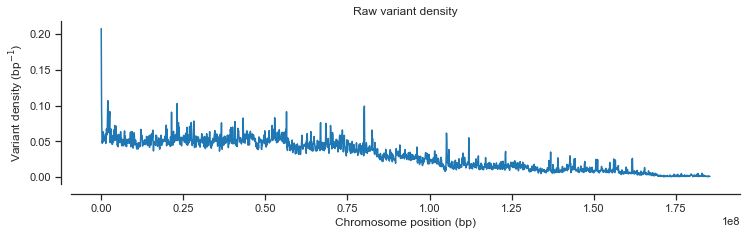

In [12]:
plot_windowed_variant_density(pos, window_size=100000, title='Raw variant density')

## To run in R ##

In [ ]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
rw.plot(x = 'pos', y = 'dp', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
rw.plot(x = 'pos', y = 'mq', ax = ax, secondary_y = True) 

In [ ]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
rw.plot(x = 'pos', y = 'dp', ax = ax) 

In [ ]:
print("depth std dev =", dp.std())
print("depth mean =", dp.mean())
print("depth max to keep =", dp.mean()+dp.std()+dp.std())

In [ ]:
masked_variants = allel.VariantChunkedTable(masked_callset['variants'],
            names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD','AF','AN'])
masked_dp=masked_variants['DP'][:]
masked_mq=masked_variants['MQ'][:]
masked_qd=masked_variants['QD'][:]
masked_pos=masked_variants['POS'][:]

In [ ]:
masked_array = np.array([masked_dp,masked_mq,masked_qd,masked_pos])
masked_rw = pd.DataFrame(masked_array)
rw_masked = masked_rw.transpose()
rw_masked.columns=["masked_dp","masked_mq","masked_qd","masked_pos"]
print(type(masked_rw))

In [ ]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
rw_masked.plot(x = 'masked_pos', y = 'masked_dp', ax = ax) 

In [ ]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
rw.plot(x = 'pos', y = 'af', ax = ax) 

In [13]:
AD_df = pd.DataFrame(AD[:])
AD_df.columns=["AD"]

In [23]:
df=AD_df[0:1]

In [ ]:
split_AD = pd.DataFrame(AD_df['AD'].tolist(AD_df['AD'].tolist()))

In [ ]:
print(type(AD))

In [ ]:
df=pd.DataFrame.from_records(AD_df[0:1])

In [ ]:
pd.DataFrame.head(df)

In [24]:
a=np.ravel(df)

In [ ]:
regular_list = df[3:4]
flat_list = list(np.concatenate(test).flat)


In [ ]:
pd.DataFrame.head(regular_list)


In [27]:
print(np.ravel(a))

[([[14, 10, -1, -1], [15,  5, -1, -1], [27,  7, -1, -1], [28, 30, -1, -1], [25, 19, -1, -1], [16, 19, -1, -1], [12, 11, -1, -1], [23, 34, -1, -1], [24, 25, -1, -1], [28, 19, -1, -1], [18, 20, -1, -1], [12, 12, -1, -1]],)]


In [ ]:
test=AD_df[4:5]

,AD
0,[[14 10 -1 -1] [15 5 -1 -1] [27 7 -1 -1] [28 30 -1 -1] [25 19 -1 -1] [16 19 -1 -1] [12 11 -1 -1] [23 34 -1 -1] [24 25 -1 -1] [28 19 -1 -1] [18 20 -1 -1] [12 12 -1 -1]]
1,[[34 4 -1 -1] [26 5 -1 -1] [44 13 -1 -1] [94 18 -1 -1] [48 21 -1 -1] [38 11 -1 -1] [27 11 -1 -1] [69 33 -1 -1] [54 19 -1 -1] [69 17 -1 -1] [56 9 -1 -1] [38 8 -1 -1]]
2,[[29 15 -1 -1] [20 7 -1 -1] [38 15 -1 -1] [85 29 -1 -1] [42 20 -1 -1] [44 21 -1 -1] [32 10 -1 -1] [73 36 -1 -1] [65 22 -1 -1] [69 22 -1 -1] [57 9 -1 -1] [40 6 -1 -1]]
...,...
2810124,[[ 8 0 -1 -1] [13 0 -1 -1] [12 0 -1 -1] [15 0 -1 -1] [15 0 -1 -1] [ 9 0 -1 -1] [ 7 4 -1 -1] [16 0 -1 -1] [13 0 -1 -1] [18 0 -1 -1] [12 0 -1 -1] [ 6 0 -1 -1]]
2810125,[[18 0 -1 -1] [17 0 -1 -1] [ 7 9 -1 -1] [29 0 -1 -1] [20 0 -1 -1] [32 0 -1 -1] [ 9 0 -1 -1] [25 0 -1 -1] [25 13 -1 -1] [15 19 -1 -1] [29 0 -1 -1] [16 0 -1 -1]]
2810126,[[12 14 -1 -1] [25 0 -1 -1] [31 0 -1 -1] [72 0 -1 -1] [42 0 -1 -1] [35 0 -1 -1] [32 0 -1 -1] [50 0 -1 -1] [49 0 -1 -1] [43 0 -1 -1] [39 0 -1 -1] [20 0 -1 -1]]


In [ ]:
np.dtype(callset)